In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
df_dict = pd.read_excel('nos-final.xlsx', sheet_name=["Transcriptions", "ByLearner", "Categories", "LearnerData","Q1", "Q2", "Q3,4", "Codes"])
transcriptions = df_dict["Transcriptions"]
df = df_dict["ByLearner"]
learners = df_dict["LearnerData"]
categories = df_dict["Categories"].Category

# Exploratory data analysis (EDA)
## Exploring the sample

In [3]:
learners['Science?'] = learners['Science?'].replace('Y', True).replace('N', False)
learners['Technology?'] = learners['Technology?'].replace('Y', True).replace('N', False)
learners.describe(include="all")

,Sc.,No.,ID,Age,Sex,Grade,Science?,Technology?
count,86.000000,86.000000,86.000000,85.000000,86,86.000000,71,71
unique,NaN,NaN,NaN,NaN,2,NaN,2,2
top,NaN,NaN,NaN,NaN,M,NaN,True,True
freq,NaN,NaN,NaN,NaN,43,NaN,68,44
mean,5.406977,15.197674,43.500000,14.682353,NaN,9.046512,NaN,NaN
std,2.573064,10.639350,24.969982,1.390544,NaN,1.146934,NaN,NaN
min,3.000000,1.000000,1.000000,12.000000,NaN,7.000000,NaN,NaN
25%,4.000000,7.250000,22.250000,14.000000,NaN,9.000000,NaN,NaN
50%,5.000000,14.000000,43.500000,15.000000,NaN,9.000000,NaN,NaN
75%,5.000000,19.750000,64.750000,16.000000,NaN,10.000000,NaN,NaN


In [4]:
display(learners.Grade.value_counts())

10    40
9     28
7     18
Name: Grade, dtype: int64

In [5]:
display(learners.Sex.value_counts())

M    43
F    43
Name: Sex, dtype: int64

In [6]:
learner_counts = pd.get_dummies(learners, columns=['Sex'])
learner_counts['Science?'] = learner_counts['Science?'].replace(True, 1).replace(False, 0)
learner_counts['Technology?'] = learner_counts['Technology?'].replace(True, 1).replace(False, 0)
display(learner_counts[['Grade', 'Sc.', 'ID']].groupby(['Grade', 'Sc.']).count())
display(learner_counts[['Grade', 'Sc.', 'Science?', 'Technology?', 'Sex_F', 'Sex_M']].groupby(['Grade', 'Sc.']).sum())
display(learner_counts.sum())

ID
Grade Sc.    
7     4    18
9     5    28
10    3    21
      10   19

Science?  Technology?  Sex_F  Sex_M
Grade Sc.                                     
7     4         8.0          8.0     10      8
9     5        28.0         28.0     17     11
10    3        13.0          7.0     10     11
      10       19.0          1.0      6     13

Sc.             465.0
No.            1307.0
ID             3741.0
Age            1248.0
Grade           778.0
Science?         68.0
Technology?      44.0
Sex_F            43.0
Sex_M            43.0
dtype: float64

In [7]:
responses = df[['ID', 'Q1', 'Q2', 'Q3', 'Q4']].merge(learners, on='ID')
responses['Q3'] = responses['Q3'].replace(np.nan, 'IMAGE')
responses = responses.replace('BLANK', np.nan)

display(responses.head())
display(responses.describe(include="all"))

,ID,Q1,Q2,Q3,Q4,Sc.,No.,Age,Sex,Grade,Science?,Technology?
0,7,Discovery of how [colestriol?] and living bodi...,Discover new things about living organisms.,NaN,NaN,5,18,14.0,M,9,True,True
1,81,Science is a platform that helps in our everyd...,Scientists are like general researchers they d...,IMAGE,I draw this picture to resemble the experiment...,5,36,15.0,F,9,True,True
2,22,It is the study of scientific things and thing...,I think they deal with chemicals and chemical ...,IMAGE,To show the scientist is dealing with chemicals,5,15,13.0,F,9,True,True
3,35,People who mix chemicals in order to discover ...,mix chemicals write/discover formulas to find ...,IMAGE,because scientists mix chemicals,5,32,14.0,M,9,True,True
4,53,It is the term that helps us know the earth be...,They research more about the earth and its bio...,IMAGE,They look into the life/earth deeply,5,42,15.0,F,9,True,True


,ID,Q1,Q2,Q3,Q4,Sc.,No.,Age,Sex,Grade,Science?,Technology?
count,86.000000,84,83,65,67,86.000000,86.000000,85.000000,86,86.000000,71,71
unique,NaN,84,83,1,67,NaN,NaN,NaN,2,NaN,2,2
top,NaN,"I would say it's a tricky subject, it really n...",Scientists are doctors. Well let me say scienc...,IMAGE,To show how a scientists looks and what it does,NaN,NaN,NaN,M,NaN,True,True
freq,NaN,1,1,65,1,NaN,NaN,NaN,43,NaN,68,44
mean,43.500000,NaN,NaN,NaN,NaN,5.406977,15.197674,14.682353,NaN,9.046512,NaN,NaN
std,24.969982,NaN,NaN,NaN,NaN,2.573064,10.639350,1.390544,NaN,1.146934,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,3.000000,1.000000,12.000000,NaN,7.000000,NaN,NaN
25%,22.250000,NaN,NaN,NaN,NaN,4.000000,7.250000,14.000000,NaN,9.000000,NaN,NaN
50%,43.500000,NaN,NaN,NaN,NaN,5.000000,14.000000,15.000000,NaN,9.000000,NaN,NaN
75%,64.750000,NaN,NaN,NaN,NaN,5.000000,19.750000,16.000000,NaN,10.000000,NaN,NaN


In [8]:
grade_responses = responses.groupby('Grade').count()
display(grade_responses)

,ID,Q1,Q2,Q3,Q4,Sc.,No.,Age,Sex,Science?,Technology?
Grade,,,,,,,,,,,
7,18,17,17,17,17,18,18,18,18,8,8
9,28,27,26,22,22,28,28,27,28,28,28
10,40,40,40,26,28,40,40,40,40,35,35


In [9]:
word_counts = responses.copy()
word_counts['Q1'] = word_counts['Q1'].str.count(' ') + 1
word_counts['Q2'] = word_counts['Q2'].str.count(' ') + 1
word_counts['Q4'] = word_counts['Q4'].str.count(' ') + 1

display(word_counts)
display(word_counts[['Q1', 'Q2', 'Q4']].describe())
display(word_counts[['Grade', 'Q1', 'Q2', 'Q4']].groupby('Grade').mean().round(1))

,ID,Q1,Q2,Q3,Q4,Sc.,No.,Age,Sex,Grade,Science?,Technology?
0,7,10.0,6.0,NaN,NaN,5,18,14.0,M,9,True,True
1,81,19.0,15.0,IMAGE,11.0,5,36,15.0,F,9,True,True
2,22,15.0,9.0,IMAGE,8.0,5,15,13.0,F,9,True,True
3,35,9.0,9.0,IMAGE,4.0,5,32,14.0,M,9,True,True
4,53,16.0,9.0,IMAGE,6.0,5,42,15.0,F,9,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
81,66,11.0,13.0,NaN,NaN,10,6,15.0,M,10,True,False
82,82,19.0,14.0,IMAGE,22.0,3,2,16.0,F,10,NaN,NaN
83,55,29.0,15.0,IMAGE,18.0,5,4,14.0,F,9,True,True
84,24,33.0,22.0,IMAGE,11.0,4,1,12.0,F,7,NaN,NaN


,Q1,Q2,Q4
count,84.000000,83.000000,67.000000
mean,20.261905,13.686747,12.477612
std,14.713422,8.394144,6.931173
min,2.000000,2.000000,2.000000
25%,11.000000,8.000000,8.000000
50%,16.000000,13.000000,11.000000
75%,26.250000,18.000000,15.500000
max,101.000000,44.000000,40.000000


,Q1,Q2,Q4
Grade,,,
7,18.4,11.5,12.5
9,15.1,9.0,8.7
10,24.6,17.6,15.5


## Word count distributions
These are a very rough measure of depth of responses from the learners.

,ID,Sc.,No.,Age,Sex,Grade,Science?,Technology?,variable,value,group
0,7,5,18,14.0,M,9,True,True,Q1,10.0,9 (5)
1,81,5,36,15.0,F,9,True,True,Q1,19.0,9 (5)
2,22,5,15,13.0,F,9,True,True,Q1,15.0,9 (5)
3,35,5,32,14.0,M,9,True,True,Q1,9.0,9 (5)
4,53,5,42,15.0,F,9,True,True,Q1,16.0,9 (5)


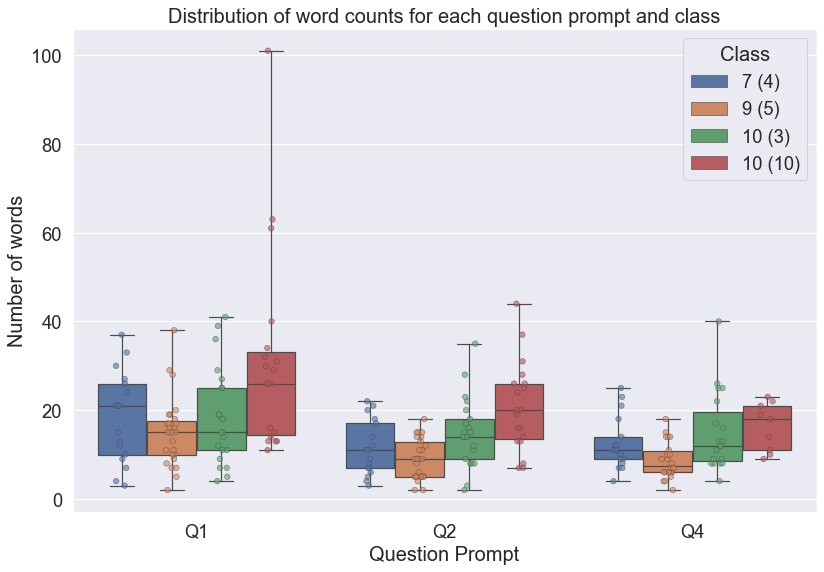

In [10]:
melted_wc = pd.melt(word_counts, id_vars=['ID', 'Sc.', 'No.', 'Age', 'Sex', 'Grade', 'Science?', 'Technology?'], value_vars=['Q1', 'Q2', 'Q4'])
melted_wc['group'] = melted_wc['Grade'].astype(str) + ' (' + melted_wc['Sc.'].astype(str) + ')'
display(melted_wc.head())

fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

melted_wc.rename(columns={'variable': 'Question Prompt', 'value': 'Number of words'}, inplace=True)

def plot_box_strip():
    #plt.subplot(2,2,pos)
    ax = sns.boxplot(data=melted_wc, x='Question Prompt', y='Number of words', hue='group', hue_order=['7 (4)', '9 (5)', '10 (3)', '10 (10)'], whis=np.inf, linewidth=1.1, palette='deep')
    ax.set_title('Distribution of word counts for each question prompt and class')
    sns.stripplot(data=melted_wc, x='Question Prompt', y='Number of words', hue='group', hue_order=['7 (4)', '9 (5)', '10 (3)', '10 (10)'], dodge=True, linewidth=0.6, alpha=0.6, size=5, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    leg = plt.legend(handles[0:4], labels[0:4])
    leg.set_title('Class')

plot_box_strip()
    
plt.show()

## Word clouds
Use the wordcloud module to produce word clouds for each of the textual responses (Questions 1, 2, and 4). This is just to get a rough sense of what the learners at the group level are saying about science. This is likely to form a seed of big themes.

In [11]:
q1_text = " ".join(response for response in transcriptions.Q1).lower()
q2_text = " ".join(response for response in transcriptions.Q2).lower()
q4_text = " ".join(response for response in transcriptions.Q4).lower()

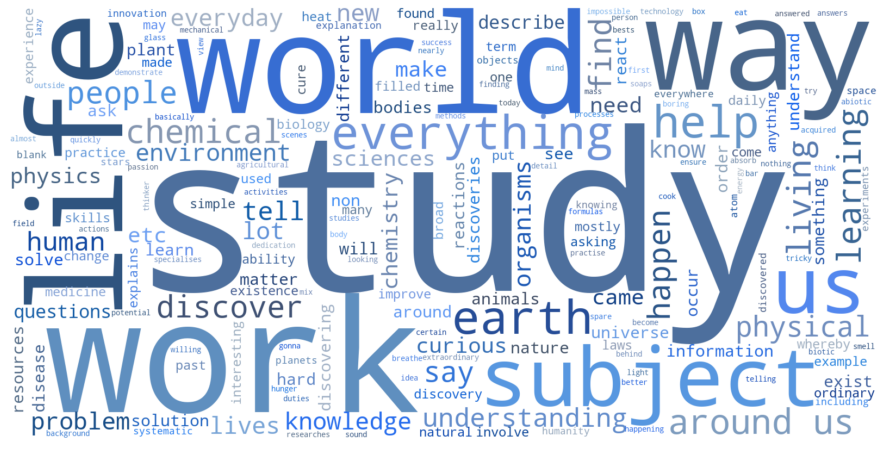

In [12]:
# add some custom words to stopwords
stopwords = set(STOPWORDS)
stopwords.update(["science", "scientific", "scientist", "scientists", "thing", "things"])

def blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    h = random.randint(210, 220)
    s = random.randint(20, 90)
    l = random.randint(30, 70)
    return "hsl({}, {}%, {}%)".format(h, s, l)

# create and generate a word cloud image
wc1 = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, scale=2, colormap='Blues').generate(q1_text)
wc1 = wc1.recolor(color_func=blue_color_func)
# Display the generated image:
plt.figure(figsize=(16, 8))
plt.imshow(wc1, interpolation='bilinear')
plt.axis("off")
plt.show()

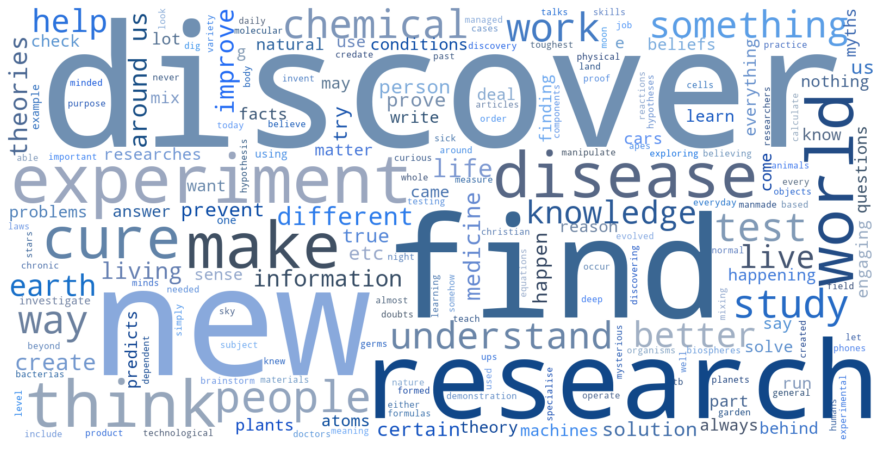

In [13]:
# add some custom words to stopwords
stopwords = set(STOPWORDS)
stopwords.update(["science", "scientific", "scientist", "scientists", "blank", "thing", "things"])

# create and generate a word cloud image
wc2 = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, scale=2).generate(q2_text)
wc2 = wc2.recolor(color_func=blue_color_func)

# Display the generated image:
plt.figure(figsize=(16, 8))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

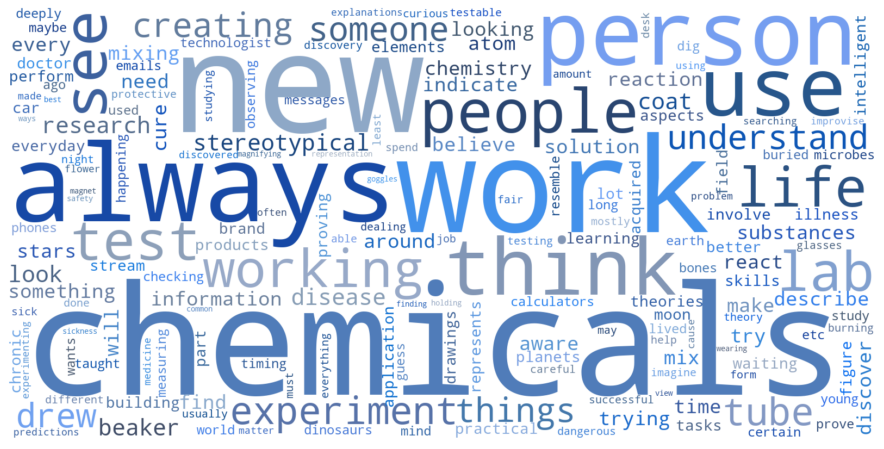

In [14]:
# add some custom words to stopwords
stopwords = set(STOPWORDS)
stopwords.update(["science", "scientific", "scientist", "scientists", "blank", "picture", "show", "shows", "draw", "drawn", "way"])

# create and generate a word cloud image
wc4 = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400, scale=2).generate(q4_text)
wc4 = wc4.recolor(color_func=blue_color_func)

# Display the generated image:
plt.figure(figsize=(16, 8))
plt.imshow(wc4, interpolation='bilinear')
plt.axis("off")
plt.show()

# Frequency of codes

In [15]:
df1 = df_dict["Q1"]
df2 = df_dict["Q2"]
df3 = df_dict["Q3,4"]
codes = df_dict["Codes"]["Primary Code"]

In [16]:
def melt_df(df):   
    codes = [f'Code {x}' for x in range(1,10)]
    df = pd.melt(df, id_vars=['ID'], value_vars=codes)
    df.rename(columns={'ID': 'id', 'value': 'code'}, inplace=True)
    df.dropna(inplace=True)
    df['q'] = df.code.str[:1]
    return df[['id', 'code', 'q']]

df1 = melt_df(df1)
df2 = melt_df(df2)
df3 = melt_df(df3)

,code,q_prompt,id
0,1. a single overall discipline,Q1,18
1,1. a single overall discipline,Q2,10
2,1. a single overall discipline,Q3+4,1
3,1. chemical,Q1,10
4,1. chemical,Q2,7


,id,q_prompt,code
0,1,Q1,4
1,1,Q2,1
2,2,Q1,2
3,2,Q2,1
4,2,Q3+4,2


,id
count,66.000000
mean,4.424242
std,4.826404
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,25.000000


,id
count,71.000000
mean,4.000000
std,4.262796
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,23.000000


,id
count,47.000000
mean,4.765957
std,8.678341
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,46.000000


,id
count,184.000000
mean,4.347826
std,5.852345
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,46.000000


<Figure size 960x640 with 0 Axes>

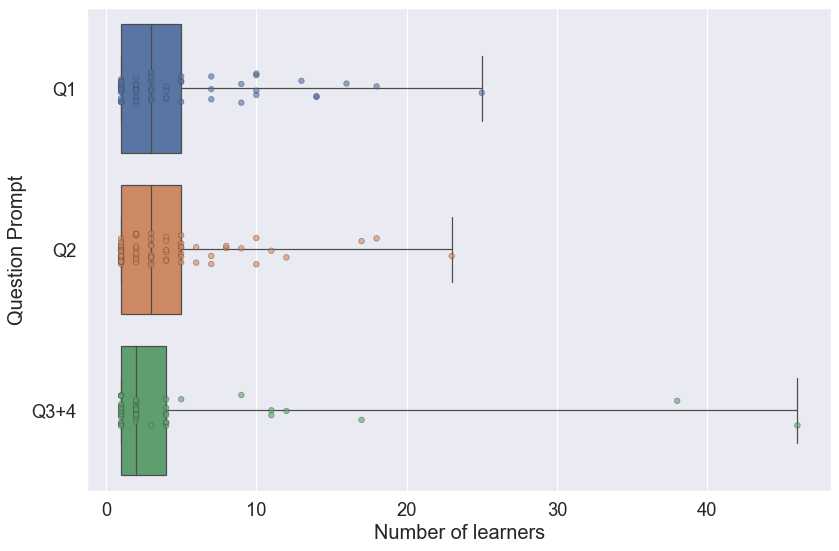

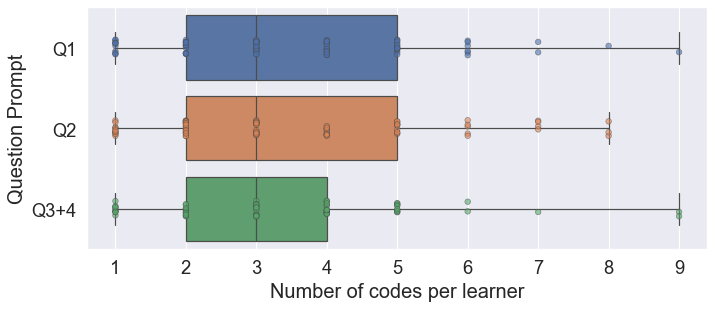

In [17]:
df1['q_prompt'] = 'Q1'
df2['q_prompt'] = 'Q2'
df3['q_prompt'] = 'Q3+4'

df_total = pd.concat([df1, df2, df3])
df_total.head()

df_learners_per_code = df_total[['id', 'code', 'q_prompt']].groupby(['code', 'q_prompt'], as_index=False).agg('count')
df_codes_per_learner = df_total[['id', 'code', 'q_prompt']].groupby(['id', 'q_prompt'], as_index=False).agg('count')

display(df_learners_per_code.head())
display(df_codes_per_learner.head())

fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

def plot_box_strip(df, y):
    df.rename(columns={'q_prompt': 'Question Prompt', 'id': 'Number of learners', 'code': 'Number of codes per learner'}, inplace=True)
    ax = sns.boxplot(data=df, y='Question Prompt', x=y, whis=np.inf, linewidth=1.1, palette='deep')
    #ax.set_title('Boxplots of code frequencies for each question prompt')
    sns.stripplot(data=df, y='Question Prompt', x=y, dodge=True, linewidth=0.6, alpha=0.6, size=5, ax=ax)
    #handles, labels = ax.get_legend_handles_labels()
    #leg = plt.legend(handles[0:4], labels[0:4])
    #leg.set_title('Class')
     

display(df_learners_per_code[df_learners_per_code.q_prompt == 'Q1'].describe())
display(df_learners_per_code[df_learners_per_code.q_prompt == 'Q2'].describe())
display(df_learners_per_code[df_learners_per_code.q_prompt == 'Q3+4'].describe())
display(df_learners_per_code.describe())
        
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
plot_box_strip(df_learners_per_code, 'Number of learners')
plt.show()

fig = plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
plot_box_strip(df_codes_per_learner, 'Number of codes per learner')
plt.show()

In [18]:
big_questions = [
    '1. What is studied?',
    '2. Basis for knowledge claims?',
    '3. Products of science?',
    '4. Tools used?',
    '5. Processes used?',
    '6. Purpose of science?',
    '7. Who does science?'
]

In [19]:
# relabel codes to match final values for display (top 10 only)

df1.code = df1.code.replace({
    '1. the world': '1a. the world / everything in the world',
    '1. a single overall discipline': '1c. science is described as a single overall discipline',
    '1. life and living things': '1d. life and living things',
    '1. humans and everyday life': '1e. humans and everyday life',
    '3. understanding how nature works': '3b. understanding how nature works',
    '5. discovery': '5a. discovery',
    '1. subjects / fields / disciplines': '1f. subjects / fields / disciplines',
    '1. processes / things happening': '1i. processes / things happening / reactions / change',
    '3. understanding everyday life': '3d. understanding everyday life',
    '1. chemical': '1b. chemicals (elements, atoms, compounds)',
})

df2.code = df2.code.replace({
    '5. discovery': '5a. discovery',
    '6. helping / beneficience to humanity': '6a. helping / beneficence to humanity',
    '3. new knowledge': '3a. new knowledge',
    '5. experimenting': '5c. experimenting',
    '6. curing disease': '6b. curing disease',
    '1. a single overall discipline': '1c. a single overall discipline',
    '1. the world': '1a. the world / everything in the world',
    '5. research': '5d. research',
    '1. humans and everyday life': '1e. humans and everyday life',
    '1. medicine': '1h. medicine',
})

df3.code = df3.code.replace({
    '7. stereotypical lab scientist': '7a. stereotypical lab scientist',
    '4. working with chemicals': '4a. working with chemicals',
    '1. chemical': '1b. chemicals (elements, atoms, compounds)',
    '7. men do science': '7b. men do science',
    '7. women do science': '7c. women do science',
    '5. studying / observing': '5b. studying / observing',
    '4. visual aids (microscope / telescope)': '4b. visual aids (microscope / telescope)',
    '6. curing disease': '6b. curing disease',
    '1. medicine': '1h. medicine',
    '1. microscopic things (the very small)': '1j. microscopic things (the very small)',
})

In [28]:
# add some custom words to stopwords
stopwords = set(STOPWORDS)
stopwords.update(["science", "scientific", "scientist", "scientists", "thing", "things"])

def get_colour_palette_for_big_questions(codes):
    return [sns.color_palette()[int(code[0]) - 1] for code in codes]

def question_analysis(df, unique=False):
    
    if unique:
        df.drop_duplicates(inplace=True)
        
    plt.figure(figsize=(16, 8))
    codes = df['code'].value_counts().iloc[:10].index
    
    # which big questions feature in the top 10?
    indices = list(set([int(code[0]) - 1 for code in codes]))
    questions_featuring = [big_questions[i] for i in indices]
    ax = sns.countplot(y='code', data=df, order=codes,
                  palette=get_colour_palette_for_big_questions(codes))
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Primary Code')
    
    patches = [mpatches.Patch(color=sns.color_palette()[int(q[0]) - 1], label=q) for q in questions_featuring]
    plt.legend(handles=patches).set_title('Big Question')
    plt.show()
    
    display(df['code'].value_counts().head(10))
    
    display(df.describe(include='all'))
    
    codes_per_learner = round(df.groupby('id').agg(['count']).mean()[0], 1)
    print("Codes per learner: {}".format(codes_per_learner))

In [21]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

### Question Prompt 1

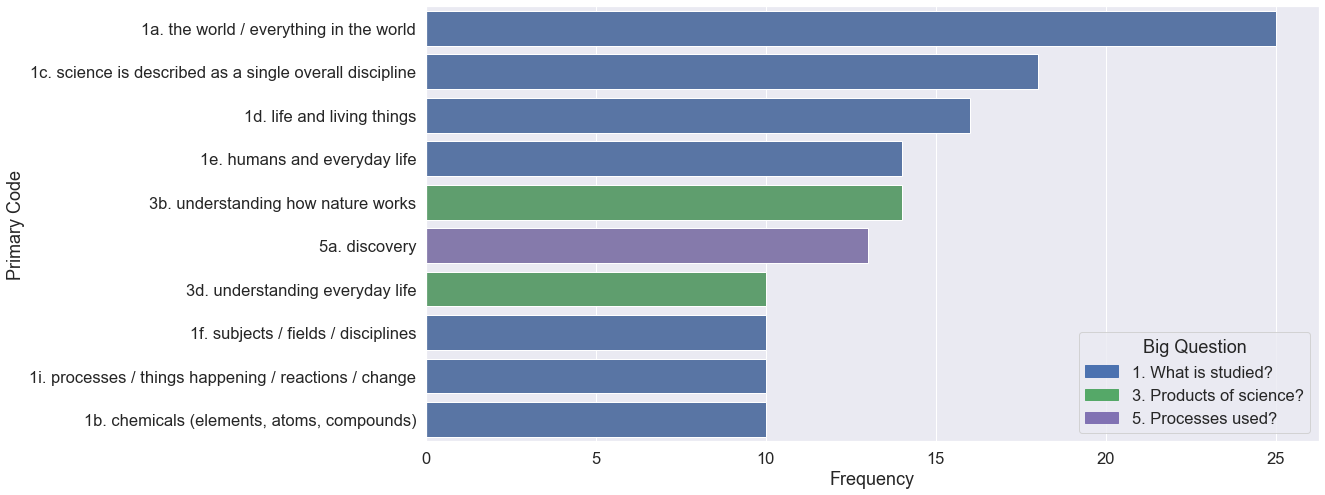

1a. the world / everything in the world                    25
1c. science is described as a single overall discipline    18
1d. life and living things                                 16
1e. humans and everyday life                               14
3b. understanding how nature works                         14
5a. discovery                                              13
3d. understanding everyday life                            10
1f. subjects / fields / disciplines                        10
1i. processes / things happening / reactions / change      10
1b. chemicals (elements, atoms, compounds)                 10
Name: code, dtype: int64

,id,code,q,q_prompt
count,292.000000,292,292,292
unique,NaN,66,7,1
top,NaN,1a. the world / everything in the world,1,Q1
freq,NaN,25,145,292
mean,44.616438,NaN,NaN,NaN
std,24.675282,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,24.750000,NaN,NaN,NaN
50%,45.000000,NaN,NaN,NaN
75%,65.000000,NaN,NaN,NaN


Codes per learner: 3.5


In [29]:
question_analysis(df1)

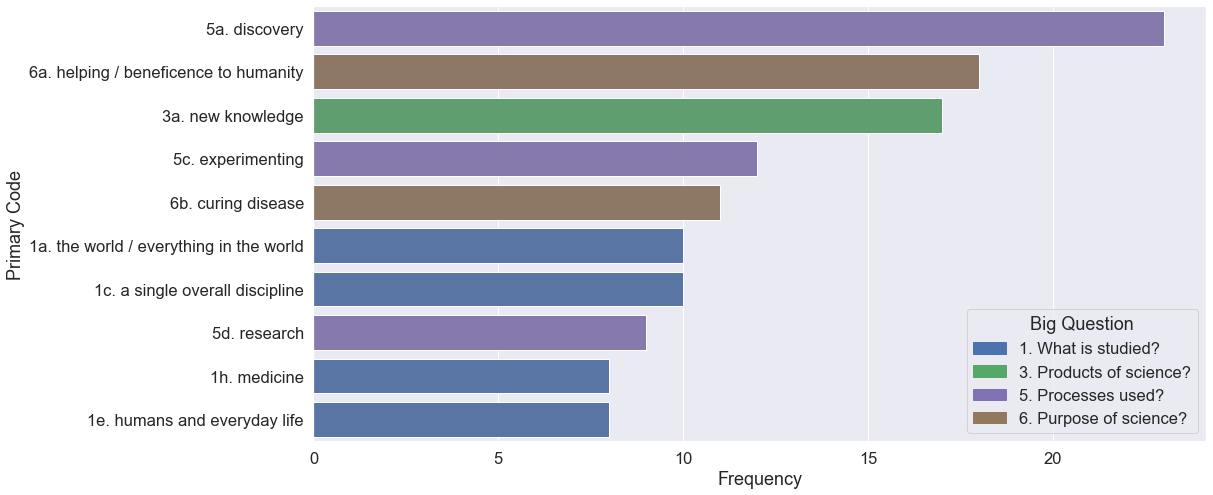

5a. discovery                              23
6a. helping / beneficence to humanity      18
3a. new knowledge                          17
5c. experimenting                          12
6b. curing disease                         11
1a. the world / everything in the world    10
1c. a single overall discipline            10
5d. research                                9
1h. medicine                                8
1e. humans and everyday life                8
Name: code, dtype: int64

,id,code,q,q_prompt
count,284.000000,284,284,284
unique,NaN,71,7,1
top,NaN,5a. discovery,1,Q2
freq,NaN,23,77,284
mean,44.073944,NaN,NaN,NaN
std,25.339912,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,22.000000,NaN,NaN,NaN
50%,43.500000,NaN,NaN,NaN
75%,68.000000,NaN,NaN,NaN


Codes per learner: 3.4


In [30]:
question_analysis(df2)

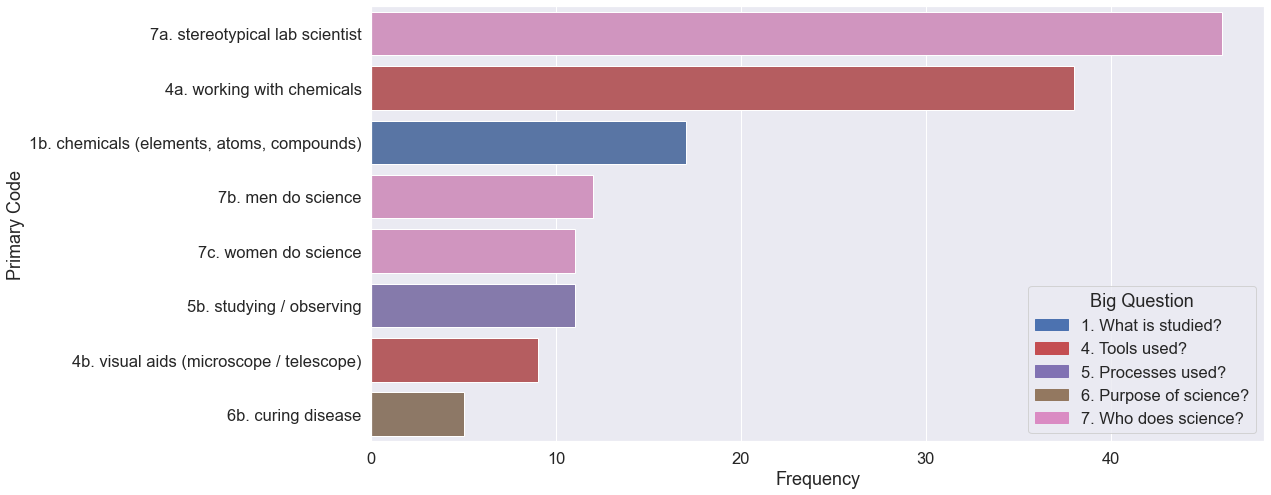

7a. stereotypical lab scientist               46
4a. working with chemicals                    38
1b. chemicals (elements, atoms, compounds)    17
7b. men do science                            12
7c. women do science                          11
5b. studying / observing                      11
4b. visual aids (microscope / telescope)       9
6b. curing disease                             5
1h. medicine                                   4
7. awareness of stereotype                     4
Name: code, dtype: int64

,id,code,q,q_prompt
count,224.000000,224,224,224
unique,NaN,47,7,1
top,NaN,7a. stereotypical lab scientist,7,Q3+4
freq,NaN,46,78,224
mean,43.803571,NaN,NaN,NaN
std,23.327975,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN
25%,23.750000,NaN,NaN,NaN
50%,44.000000,NaN,NaN,NaN
75%,60.000000,NaN,NaN,NaN


Codes per learner: 3.4


In [24]:
question_analysis(df3)

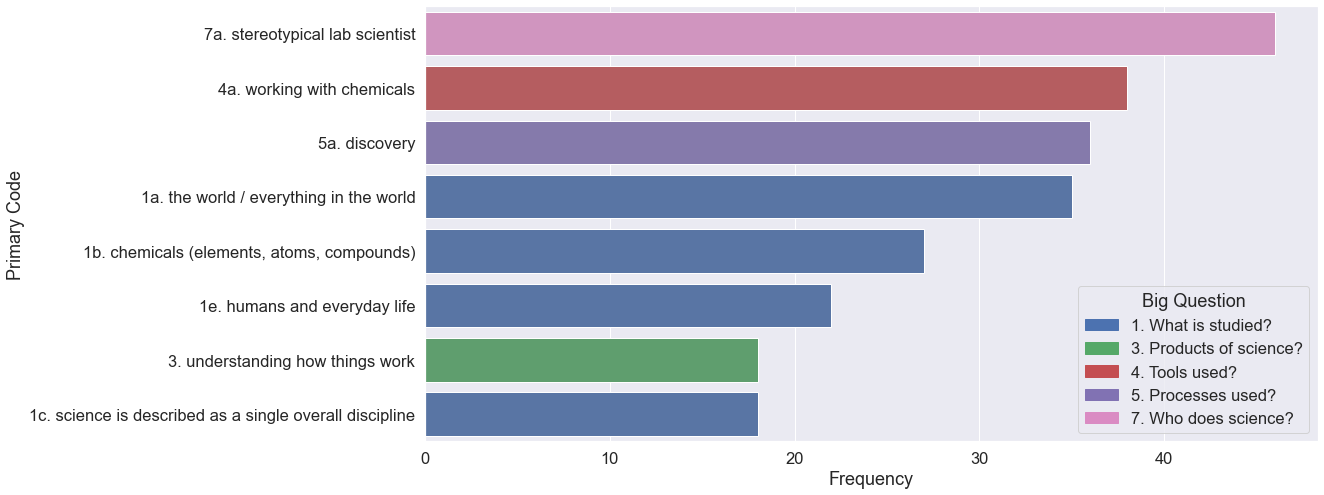

7a. stereotypical lab scientist                            46
4a. working with chemicals                                 38
5a. discovery                                              36
1a. the world / everything in the world                    35
1b. chemicals (elements, atoms, compounds)                 27
1e. humans and everyday life                               22
3. understanding how things work                           18
1c. science is described as a single overall discipline    18
6a. helping / beneficence to humanity                      18
3a. new knowledge                                          17
Name: code, dtype: int64

,id,code,q,q_prompt
count,800.000000,800,800,800
unique,NaN,111,7,3
top,NaN,7a. stereotypical lab scientist,1,Q1
freq,NaN,46,262,292
mean,44.196250,NaN,NaN,NaN
std,24.519007,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,23.000000,NaN,NaN,NaN
50%,44.000000,NaN,NaN,NaN
75%,65.000000,NaN,NaN,NaN


Codes per learner: 9.5


In [25]:
df_all = pd.concat([df1, df2, df3])
question_analysis(df_all)

In [34]:
pal = sns.color_palette()
display(pal)
print(pal.as_hex())

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


# Combined frequency analysis
- 59 of 76 codes featured
- ranged from 1 to 15 uses

In [26]:
# codes not used
codes_used = set(df_all.code.value_counts().index)
all_codes = set(codes)
codes_not_used = sorted(list(all_codes - codes_used))
print(len(codes_not_used))
for code in codes_not_used:
    print(code)

22
1. humans and everyday life
1M. models represent reality
2T. distinction between observations and inferences
2T. empirical nature of science
3M. hypothesis → theory → law
3T. product of human inference, imagination and creativity
3T. relationship between theories and laws
3T. scienctific knowledge is tentative
3T. subjective and theory-laden
4. visual aids (microscope / telescope)
5. multiple methods
5. research
5. subjective interpretation
5M. hypothesis as an educated guess
5M. sciences follows steps and is not creative
5M. scientific conclusions are reviewed for accuracy
5M. there is a single general and universal method
6. driven by economic needs
7. men do science
7. women do science
7M. scientists are particularly objective
7T. socially and culturally embedded nature of science


## Code counts by "big question"

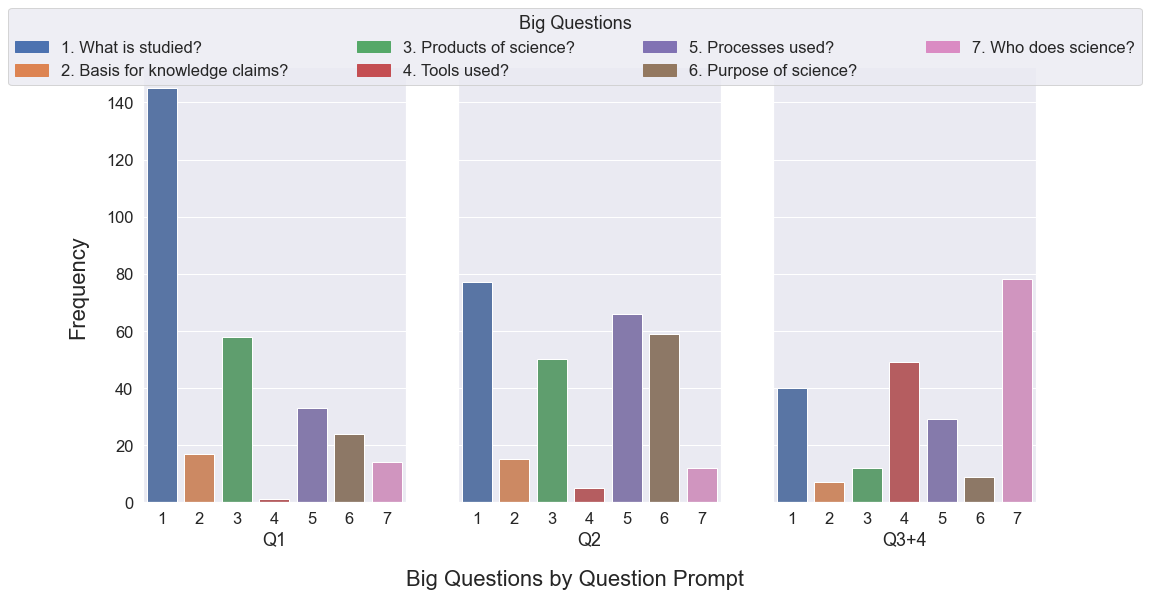

In [27]:
big_question_nums = [str(i) for i in range(1, 8)]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16,8))

labels = ['Q1', 'Q2', 'Q3+4']

def plot_big_question_counts(df, pos, ax):
    sns.countplot(data=df, x='q', order=big_question_nums, ax=ax)
    ax.set_xlabel(labels[pos - 1])
    ax.set_ylabel('')

plt.rcParams.update({'font.size': 22})
fig.text(0.5, -0.02, 'Big Questions by Question Prompt', ha='center')
fig.text(0.06, 0.5, 'Frequency', va='center', rotation='vertical')

patches = [mpatches.Patch(color=sns.color_palette()[int(q[0]) - 1], label=q) for q in big_questions]
fig.legend(handles=patches, loc='upper right', mode='expand', ncol=4).set_title('Big Questions')

plot_big_question_counts(df1, 1, ax1)
plot_big_question_counts(df2, 2, ax2)
plot_big_question_counts(df3, 3, ax3)
plt.show()